In [241]:
import pandas as pd

import seaborn as sns

sns.set_context("talk")
import matplotlib.pyplot as plt
import statsmodels

import statsmodels.formula.api as smf
import numpy as np
plt.style.use("ggplot")

In [242]:
data=pd.read_csv('clean_data/final_dataset.csv')

In [243]:
data[['income_census','pop_census']]=np.log(data[['income_census','pop_census']])

In [293]:
data=data.query('nhwrate>0.9 and nativerate<0.025').reset_index(drop=True)

# OLS

## Mormon-> bad outcomes

In [295]:
#https://www.deseretnews.com/article/900008667/utah-is-taking-a-closer-look-at-how-and-what-people-drink-when-it-comes-to-alcohol.html

In [296]:
smf.ols('mortality_alcohol~mormon',data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mortality_alcohol   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     39.96
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           3.62e-10
Time:                        22:20:45   Log-Likelihood:                -1716.3
No. Observations:                1234   AIC:                             3437.
Df Residuals:                    1232   BIC:                             3447.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3338      0.028     82.632      0.000       2.278       2.389
mormon         0.0020      0.000      6.321      0.000       0.001       0.003
==============================================================================
Omnibus:                      353.274   Durbin-Watson:                   1.315
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1101.843
Skew:                           1.417   Prob(JB):                    5.47e-240
Kurtosis:                       6.661   Cond. No.                         92.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [297]:
#Just income
smf.ols('mortality_alcohol~(income_census)+pov_saipe_2010',data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mortality_alcohol   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     23.22
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           1.27e-10
Time:                        22:20:46   Log-Likelihood:                -1713.2
No. Observations:                1234   AIC:                             3432.
Df Residuals:                    1231   BIC:                             3448.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -14.9873      2.902     -5.164      0.000     -20.681      -9.293
income_census      1.6403      0.279      5.885      0.000       1.093       2.187
pov_saipe_2010     6.4281      0.947      6.784      0.000       4.569       8.287
==============================================================================
Omnibus:                      376.432   Durbin-Watson:                   1.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1241.317
Skew:                           1.491   Prob(JB):                    2.83e-270
Kurtosis:                       6.905   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [298]:
## Controls for income and race
smf.ols('mortality_alcohol~income_census+(pop_census)*mormon+state_mormon+pov_saipe_2010',data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mortality_alcohol   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     27.73
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           3.60e-31
Time:                        22:20:46   Log-Likelihood:                -1657.5
No. Observations:                1234   AIC:                             3329.
Df Residuals:                    1227   BIC:                             3365.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -18.1112      2.842     -6.372      0.000     -23.687     -12.535
income_census         2.0098      0.277      7.253      0.000       1.466       2.553
pop_census           -0.0849      0.025     -3.462      0.001      -0.133      -0.037
mormon               -0.0066      0.003     -2.132      0.033      -0.013      -0.001
pop_census:mormon     0.0006      0.000      1.896      0.058   -2.12e-05       0.001
state_mormon          5.3772      0.849      6.332      0.000       3.711       7.043
pov_saipe_2010        7.6223      0.929      8.203      0.000       5.799       9.445
==============================================================================
Omnibus:                      342.171   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1087.618
Skew:                           1.362   Prob(JB):                    6.71e-237
Kurtosis:                       6.705   Cond. No.                     9.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [299]:
## Fixed effects
smf.ols('mortality_alcohol~state',data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mortality_alcohol   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     25.01
Date:                Sun, 23 Dec 2018   Prob (F-statistic):          2.24e-131
Time:                        22:20:47   Log-Likelihood:                -1353.0
No. Observations:                1234   AIC:                             2790.
Df Residuals:                    1192   BIC:                             3005.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.6514      0.279      5.928      0.000       1.105       2.198
state[T.Arkansas]           0.1407      0.317      0.444      0.657      -0.480       0.762
state[T.California]         1.6586      0.788      2.105      0.035       0.113       3.204
state[T.Colorado]           1.7493      0.341      5.127      0.000       1.080       2.419
state[T.Connecticut]        0.4686      0.788      0.595      0.552      -1.077       2.014
state[T.Florida]            2.3836      0.591      4.034      0.000       1.224       3.543
state[T.Georgia]            0.5761      0.351      1.644      0.101      -0.112       1.264
state[T.Idaho]              1.5848      0.334      4.745      0.000       0.930       2.240
state[T.Illinois]          -0.2598      0.294     -0.884      0.377      -0.836       0.317
state[T.Indiana]            0.1660      0.293      0.566      0.571      -0.409       0.741
state[T.Iowa]               0.4544      0.291      1.563      0.118      -0.116       1.025
state[T.Kansas]             1.0616      0.295      3.603      0.000       0.484       1.640
state[T.Kentucky]           0.5856      0.289      2.028      0.043       0.019       1.152
state[T.Louisiana]         -0.5114      0.591     -0.865      0.387      -1.671       0.648
state[T.Maine]              1.6206      0.337      4.804      0.000       0.959       2.282
state[T.Maryland]           0.0736      0.591      0.125      0.901      -1.086       1.233
state[T.Massachusetts]      2.1819      0.509      4.290      0.000       1.184       3.180
state[T.Michigan]           1.0090      0.298      3.388      0.001       0.425       1.593
state[T.Minnesota]          0.9972      0.295      3.385      0.001       0.419       1.575
state[T.Mississippi]        0.8786      0.591      1.487      0.137      -0.281       2.038
state[T.Missouri]           0.3407      0.290      1.176      0.240      -0.228       0.909
state[T.Montana]            2.3992      0.306      7.843      0.000       1.799       2.999
state[T.Nebraska]           0.2646      0.292      0.906      0.365      -0.309       0.838
state[T.New Hampshire]      2.3463      0.371      6.317      0.000       1.618       3.075
state[T.New York]           0.0743      0.311      0.239      0.812      -0.537       0.685
state[T.North Carolina]     1.0940      0.356      3.070      0.002       0.395       1.793
state[T.North Dakota]       1.2621      0.306      4.126      0.000       0.662       1.862
state[T.Ohio]              -0.0174      0.293     -0.059      0.953      -0.592       0.557
state[T.Oklahoma]           1.4336      0.591      2.426      0.015       0.274       2.593
state[T.Oregon]             3.4043      0.394      8.642      0.000       2.631       4.177
state[T.Pennsylvania]      -0.1477      0.299  

In [300]:
## Fixed effects
model=smf.ols('mortality_alcohol~income_census+pop_census*mormon+state+state_mormon',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mortality_alcohol   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     24.94
Date:                Sun, 23 Dec 2018   Prob (F-statistic):          1.32e-139
Time:                        22:20:48   Log-Likelihood:                -1325.6
No. Observations:                1234   AIC:                             2743.
Df Residuals:                    1188   BIC:                             2979.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  11.8493      1.628      7.279      0.000       8.655      15.043
state[T.Arkansas]           0.1509      0.310      0.486      0.627      -0.458       0.760
state[T.California]         2.2943      0.777      2.951      0.003       0.769       3.819
state[T.Colorado]           2.4191      0.348      6.956      0.000       1.737       3.101
state[T.Connecticut]        1.0109      0.778      1.299      0.194      -0.516       2.538
state[T.Florida]            2.3787      0.579      4.109      0.000       1.243       3.515
state[T.Georgia]            0.7428      0.344      2.158      0.031       0.068       1.418
state[T.Idaho]              1.6607      0.309      5.380      0.000       1.055       2.266
state[T.Illinois]           0.0116      0.291      0.040      0.968      -0.560       0.583
state[T.Indiana]            0.3551      0.289      1.230      0.219      -0.211       0.921
state[T.Iowa]               0.7599      0.288      2.635      0.009       0.194       1.326
state[T.Kansas]             1.4003      0.294      4.761      0.000       0.823       1.977
state[T.Kentucky]           0.5732      0.283      2.023      0.043       0.017       1.129
state[T.Louisiana]         -0.2439      0.580     -0.420      0.674      -1.382       0.895
state[T.Maine]              1.8081      0.332      5.445      0.000       1.157       2.460
state[T.Maryland]           0.4528      0.582      0.778      0.437      -0.690       1.595
state[T.Massachusetts]      2.5738      0.504      5.109      0.000       1.586       3.562
state[T.Michigan]           1.1582      0.293      3.952      0.000       0.583       1.733
state[T.Minnesota]          1.3213      0.293      4.513      0.000       0.747       1.896
state[T.Mississippi]        0.8278      0.579      1.429      0.153      -0.308       1.964
state[T.Missouri]           0.4291      0.284      1.511      0.131      -0.128       0.986
state[T.Montana]            2.7014      0.298      9.058      0.000       2.116       3.287
state[T.Nebraska]           0.6343      0.294      2.157      0.031       0.057       1.211
state[T.New Hampshire]      2.7061      0.369      7.332      0.000       1.982       3.430
state[T.New York]           0.2747      0.307      0.894      0.372      -0.328       0.878
state[T.North Carolina]     1.2214      0.349      3.495      0.000       0.536       1.907
state[T.North Dakota]       1.7486      0.311      5.628      0.000       1.139       2.358
state[T.Ohio]               0.0773      0.288      0.269      0.788      -0.487       0.642
state[T.Oklahoma]           1.8229      0.583      3.127      0.002       0.679       2.967
state[T.Oregon]             3.7053      0.385      9.614      0.000       2.949       4.461
state[T.Pennsylvania]      -0.0406      0.295  

Text(0, 0.5, 'Predicted mortality')

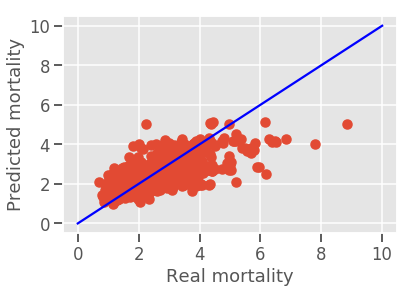

In [301]:
## How good is this?
plt.scatter(data.mortality_alcohol,model.predict(data))
plt.plot([0,10],[0,10],color='blue')
plt.xlabel('Real mortality')
plt.ylabel('Predicted mortality')

In [302]:
X = data[data.county.str.contains("Salt Lake|Fairfax|District")]
predicted = model.predict(X)
X[["mortality_alcohol", "state", "county"]].assign(predicted=predicted).set_index(
    ["state", "county"]
).plot.barh()

TypeError: Empty 'DataFrame': no numeric data to plot

In [303]:
## Same on saipe
model=smf.ols('mortality_alcohol~(income_census)+(pop_census)*mormon+state+state_mormon+pov_saipe_2010',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mortality_alcohol   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     25.33
Date:                Sun, 23 Dec 2018   Prob (F-statistic):          1.49e-143
Time:                        22:20:57   Log-Likelihood:                -1314.0
No. Observations:                1234   AIC:                             2722.
Df Residuals:                    1187   BIC:                             2963.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.7337      2.510      1.089      0.276      -2.191       7.658
state[T.Arkansas]           0.2303      0.308      0.748      0.455      -0.374       0.834
state[T.California]         2.2527      0.771      2.924      0.004       0.741       3.764
state[T.Colorado]           2.4210      0.345      7.024      0.000       1.745       3.097
state[T.Connecticut]        1.0376      0.772      1.345      0.179      -0.476       2.551
state[T.Florida]            2.3059      0.574      4.017      0.000       1.180       3.432
state[T.Georgia]            0.7686      0.341      2.253      0.024       0.099       1.438
state[T.Idaho]              1.6798      0.306      5.491      0.000       1.080       2.280
state[T.Illinois]           0.1528      0.290      0.527      0.598      -0.416       0.722
state[T.Indiana]            0.5266      0.288      1.826      0.068      -0.039       1.092
state[T.Iowa]               0.9311      0.288      3.231      0.001       0.366       1.496
state[T.Kansas]             1.5668      0.294      5.336      0.000       0.991       2.143
state[T.Kentucky]           0.5564      0.281      1.981      0.048       0.005       1.108
state[T.Louisiana]         -0.1289      0.576     -0.224      0.823      -1.258       1.000
state[T.Maine]              1.8865      0.330      5.725      0.000       1.240       2.533
state[T.Maryland]           0.5279      0.577      0.915      0.361      -0.605       1.660
state[T.Massachusetts]      2.5474      0.499      5.102      0.000       1.568       3.527
state[T.Michigan]           1.2218      0.291      4.202      0.000       0.651       1.792
state[T.Minnesota]          1.5006      0.293      5.128      0.000       0.926       2.075
state[T.Mississippi]        1.0127      0.575      1.760      0.079      -0.116       2.141
state[T.Missouri]           0.5284      0.282      1.872      0.061      -0.025       1.082
state[T.Montana]            2.7464      0.296      9.287      0.000       2.166       3.327
state[T.Nebraska]           0.8069      0.294      2.748      0.006       0.231       1.383
state[T.New Hampshire]      2.7787      0.366      7.590      0.000       2.060       3.497
state[T.New York]           0.3801      0.305      1.245      0.214      -0.219       0.979
state[T.North Carolina]     1.2147      0.346      3.507      0.000       0.535       1.894
state[T.North Dakota]       1.8847      0.309      6.094      0.000       1.278       2.491
state[T.Ohio]               0.1859      0.286      0.650      0.516      -0.375       0.747
state[T.Oklahoma]           1.9427      0.578      3.359      0.001       0.808       3.078
state[T.Oregon]             3.7100      0.382      9.713      0.000       2.961       4.459
state[T.Pennsylvania]       0.1041      0.294  

In [304]:
## Same on saipe, no FE
model=smf.ols('mortality_alcohol~(income_census)+(pop_census)*mormon+state_mormon+pov_saipe_2010',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mortality_alcohol   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     27.73
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           3.60e-31
Time:                        22:21:00   Log-Likelihood:                -1657.5
No. Observations:                1234   AIC:                             3329.
Df Residuals:                    1227   BIC:                             3365.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -18.1112      2.842     -6.372      0.000     -23.687     -12.535
income_census         2.0098      0.277      7.253      0.000       1.466       2.553
pop_census           -0.0849      0.025     -3.462      0.001      -0.133      -0.037
mormon               -0.0066      0.003     -2.132      0.033      -0.013      -0.001
pop_census:mormon     0.0006      0.000      1.896      0.058   -2.12e-05       0.001
state_mormon          5.3772      0.849      6.332      0.000       3.711       7.043
pov_saipe_2010        7.6223      0.929      8.203      0.000       5.799       9.445
==============================================================================
Omnibus:                      342.171   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1087.618
Skew:                           1.362   Prob(JB):                    6.71e-237
Kurtosis:                       6.705   Cond. No.                     9.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

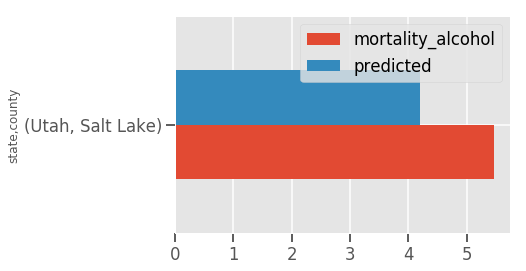

In [255]:
X = data[data.county.str.contains("Salt Lake|Fairfax|District")]
predicted = model.predict(X)
X[["mortality_alcohol", "state", "county"]].assign(predicted=predicted).set_index(
    ["state", "county"]
).plot.barh()

In [269]:
#Does adding all the other religions help?
## Same on saipe
model=smf.ols('mortality_alcohol~(income_census)+(pop_census)*mormon'
              '+state+state_mormon+'
              'o_jew+muslim+pov_saipe_2010+altitude',data=data).fit()
model.summary()
#A bit, Loglikelihood,R2 went up, BIC is a bit petter

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mortality_alcohol   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     34.37
Date:                Sun, 23 Dec 2018   Prob (F-statistic):          1.12e-249
Time:                        22:15:16   Log-Likelihood:                -2555.0
No. Observations:                2083   AIC:                             5224.
Df Residuals:                    2026   BIC:                             5546.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.3750      1.876     -0.200      0.842      -4.055       3.305
state[T.Alaska]            11.1313      0.857     12.994      0.000       9.451      12.811
state[T.Arizona]            2.6011      0.615      4.229      0.000       1.395       3.807
state[T.Arkansas]           0.2889      0.186      1.554      0.120      -0.076       0.653
state[T.California]         1.5791      0.265      5.953      0.000       1.059       2.099
state[T.Colorado]           1.9704      0.253      7.777      0.000       1.474       2.467
state[T.Connecticut]        0.7122      0.405      1.760      0.079      -0.081       1.506
state[T.Delaware]           1.0210      0.849      1.202      0.230      -0.645       2.687
state[T.Florida]            1.7968      0.193      9.301      0.000       1.418       2.176
state[T.Georgia]            1.0338      0.182      5.681      0.000       0.677       1.391
state[T.Idaho]              1.0651      0.219      4.855      0.000       0.635       1.495
state[T.Illinois]           0.1471      0.172      0.857      0.392      -0.190       0.484
state[T.Indiana]            0.4900      0.172      2.851      0.004       0.153       0.827
state[T.Iowa]               0.9096      0.172      5.297      0.000       0.573       1.246
state[T.Kansas]             1.6170      0.176      9.188      0.000       1.272       1.962
state[T.Kentucky]           0.4612      0.164      2.821      0.005       0.141       0.782
state[T.Louisiana]          0.0990      0.260      0.381      0.703      -0.411       0.609
state[T.Maine]              1.7335      0.260      6.659      0.000       1.223       2.244
state[T.Maryland]           0.5068      0.264      1.922      0.055      -0.010       1.024
state[T.Massachusetts]      2.0163      0.287      7.033      0.000       1.454       2.579
state[T.Michigan]           1.0889      0.175      6.235      0.000       0.746       1.431
state[T.Minnesota]          1.4451      0.180      8.031      0.000       1.092       1.798
state[T.Mississippi]        0.2863      0.236      1.213      0.225      -0.177       0.749
state[T.Missouri]           0.4566      0.165      2.765      0.006       0.133       0.780
state[T.Montana]            2.3755      0.216     10.985      0.000       1.951       2.800
state[T.Nebraska]           0.7484      0.182      4.123      0.000       0.392       1.104
state[T.Nevada]             3.0588      0.413      7.410      0.000       2.249       3.868
state[T.New Hampshire]      2.6139      0.304      8.592      0.000       2.017       3.211
state[T.New Jersey]         0.6543      0.321      2.041      0.041       0.026       1.283
state[T.New Mexico]         5.6289      0.623      9.035      0.000       4.407       6.851
state[T.New York]           0.1550      0.189  

## Conclusion
For fixed effects model:
* Mormon coefficient for pov_saipe_2010=0.0002 (p=0.028)
* Mormon coefficient for state_mormon=0.0739 (p<0.001)



# Predicting with XGBoost
XGBoost is a library that enables one to train gradient boosted trees, which should better capture odd nonlinearities present in the data.

It has many parameters to tune, so I leave it in the bands of BayesSearchCV to find the optimal ones. It will try a combination of parameters, run a k-fold CV to estimate accuracy, and then make a guess about what the best combinations of parameters is, up to n times.

In [305]:
import xgboost as xgb

X_plain = data[
    [
        "state",
        "mormon",
        "pop_census",
        "income_census",
        "state_mormon",
        "o_jew",
        "muslim",
        "pov_saipe_2010",
        "altitude"
    ]
]
y = data.mortality_alcohol
st_dummie = pd.get_dummies(data.state)
X = pd.concat([X_plain.drop(columns="state"), st_dummie], axis=1)

In [306]:
# https://www.kaggle.com/nikitpatel/random-grid-bayes-search-cv-for-xgb
from skopt import BayesSearchCV
from sklearn.model_selection import KFold

ITERATIONS = 40


def get_bayes_tuner(estimator, search_space):
    return BayesSearchCV(
        estimator=estimator,
        search_spaces=search_space,
        cv=KFold(n_splits=20, shuffle=True, random_state=42),
        n_jobs=6,
        n_iter=ITERATIONS,
        verbose=0,
        refit=True,
        random_state=42,
    )

In [307]:
result = get_bayes_tuner(xgb.XGBRegressor(n_jobs=2, silent=1),{
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (0, 12),       
        'subsample': (0.5, 1.0, 'uniform'),
        'colsample_bytree': (0.3, 1.0, 'uniform'),
        'colsample_bylevel': (0.5, 1.0, 'uniform'),
        'n_estimators': (50, 100,120)
    }).fit(
    X, y
)

In [308]:
#True score
result.best_score_

0.4278179164103246

In [309]:
#Fake score because we are training on the whole set
result.score(X,y)

0.8188596309723071

[<matplotlib.lines.Line2D at 0x7f8c2083c668>]

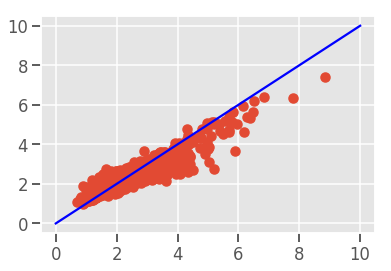

In [310]:
plt.scatter(y,result.predict(X))
plt.plot([0,10],[0,10],color='blue')

In [313]:
result.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
       colsample_bytree=0.5396528261855567, gamma=0,
       learning_rate=0.05507041167275803, max_delta_step=0, max_depth=9,
       min_child_weight=0, missing=None, n_estimators=100, n_jobs=2,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=1.0)

In [312]:
pd.options.display.max_columns=9999
pd.DataFrame(result.cv_results_).sort_values('mean_test_score',ascending=False)

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_subsample,params
26,0.440913,0.479496,0.430276,0.487525,0.469429,0.362060,0.531836,0.642762,0.500817,0.477759,0.164562,0.433020,0.553977,0.450281,-0.020473,0.374360,0.448353,4.665338e-01,0.421597,0.434139,0.427818,0.135526,1,0.140007,0.016376,0.002414,0.001035,0.500000,0.539653,0.055070,9,0,100,1.000000,"{'colsample_bylevel': 0.5, 'colsample_bytree':..."
38,0.434193,0.348049,0.398767,0.488535,0.493218,0.352453,0.533435,0.638988,0.479833,0.463071,0.229296,0.433620,0.568042,0.474262,0.007996,0.405997,0.402518,4.676590e-01,0.423567,0.425159,0.423763,0.126325,1,0.239555,0.050496,0.004795,0.002275,0.500000,0.571023,0.084619,9,0,100,1.000000,"{'colsample_bylevel': 0.5, 'colsample_bytree':..."
29,0.418030,0.370556,0.427678,0.486072,0.472566,0.320330,0.525025,0.629315,0.547597,0.492242,0.177812,0.421798,0.556392,0.465691,0.025776,0.354165,0.457525,4.770074e-01,0.431095,0.408511,0.423572,0.130125,1,0.133842,0.016801,0.001749,0.000225,0.500000,0.384119,0.039869,9,0,120,1.000000,"{'colsample_bylevel': 0.5, 'colsample_bytree':..."
27,0.455653,0.459208,0.412426,0.437383,0.478921,0.305914,0.480470,0.630073,0.560868,0.476980,0.196063,0.389797,0.529571,0.450371,0.072410,0.358222,0.439764,5.134689e-01,0.408348,0.390876,0.422624,0.120073,1,0.149880,0.034122,0.003074,0.001450,0.500000,0.408694,0.031990,9,0,100,1.000000,"{'colsample_bylevel': 0.5, 'colsample_bytree':..."
35,0.419135,0.433910,0.416662,0.520903,0.455251,0.355636,0.559378,0.666583,0.550367,0.518716,0.124853,0.397566,0.530351,0.365302,-0.002720,0.366859,0.472788,4.367946e-01,0.427477,0.399969,0.421132,0.143098,1,0.178175,0.042379,0.004161,0.001235,0.500000,0.351062,0.083195,9,0,100,1.000000,"{'colsample_bylevel': 0.5, 'colsample_bytree':..."
30,0.442719,0.462709,0.417833,0.437967,0.470016,0.305316,0.494181,0.632034,0.559316,0.428485,0.190965,0.405175,0.511319,0.405468,0.063381,0.350033,0.457350,4.767318e-01,0.434308,0.411418,0.418091,0.119490,1,0.091769,0.027092,0.002153,0.001196,0.500000,0.300000,0.040891,8,0,100,1.000000,"{'colsample_bylevel': 0.5, 'colsample_bytree':..."
20,0.448039,0.440230,0.420044,0.499657,0.489080,0.321746,0.498717,0.642099,0.584364,0.445997,0.179219,0.409158,0.503861,0.346120,-0.104364,0.309542,0.450798,4.906997e-01,0.447474,0.429111,0.412946,0.152682,1,0.115663,0.025705,0.002490,0.001640,0.594797,0.300000,0.065501,10,8,100,1.000000,"{'colsample_bylevel': 0.5947968139807513, 'col..."
37,0.488587,0.373295,0.401076,0.505425,0.440369,0.329779,0.585326,0.631453,0.529580,0.457380,0.121433,0.415733,0.540812,0.407562,-0.038489,0.365792,0.389205,4.643629e-01,0.400238,0.403245,0.410997,0.145971,1,0.198014,0.051482,0.005041,0.006103,0.500000,0.468205,0.085918,8,0,120,1.000000,"{'colsample_bylevel': 0.5, 'colsample_bytree':..."
36,0.463364,0.411047,0.437596,0.434597,0.479072,0.323758,0.531796,0.630332,0.550872,0.472750,0.142490,0.363228,0.507591,0.336089,-0.022026,0.298889,0.493292,5.197321e-01,0.410451,0.418326,0.410440,0.142972,1,0.063244,0.022346,0.002578,0.001055,0.500000,0.300000,0.135104,8,10,50,1.000000,"{'colsample_bylevel': 0.5, 'colsample_bytree':..."
23,0.436252,0.364483,0.426428,0.499343,0.405952,0.304947,0.514864,0.605628,0.565022,0.473957,0.147076,0.421254,0.509189,0.425109,-0.060813,0.406843,0.399561,4.839668e-01,0.432070,0.416473,0.409184,0.142273,1,0.231823,0.039810,0.003989,0.001529,0.604867,0.430023,0.085127,9,0,100,1.000000,"{'colsample_bylevel': 0.604866

In [315]:
xgb_opt=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
       colsample_bytree=0.5396528261855567, gamma=0,
       learning_rate=0.05507041167275803, max_delta_step=0, max_depth=9,
       min_child_weight=0, missing=None, n_estimators=100, n_jobs=2,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=1.0)
xgb_opt.fit(X,y)
xgb_opt.score(X,y)

0.8188596309723071

<Figure size 864x1008 with 0 Axes>

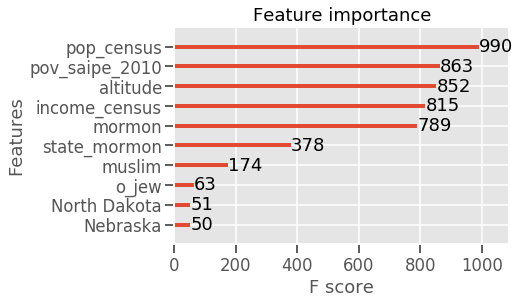

In [316]:
plt.figure(figsize=(12,14))
xgb.plot_importance(xgb_opt,max_num_features=10)

These feature importances are fake news because of multicollinearity issues (religiosity is collinear with the religion variables, for example), so we turn to SHAP to see what features drive this model.

[SHAP](https://arxiv.org/pdf/1705.07874.pdf) produces a score for each pair of (feature,sample), indicating how much that feature contributed in that particular case. In effect SHAP is solving a credit assignment problem.

Unlike with the coefficients in OLS, here we have scores per pair of features, which make it more important to visualise what is going on on a case by case basis to see if trends emerge

In [273]:
import shap
shap.initjs()

In [317]:
explainer=shap.TreeExplainer(xgb_opt)
shaps=explainer.shap_values(X)

In [318]:
#Model prediction: What happens if

'Position is 73'

,Baseline,Predicted,NM County,NM State,NM State&County,No Religion
0,1.92,2.011416,2.913451,1.930182,2.57678,2.57678


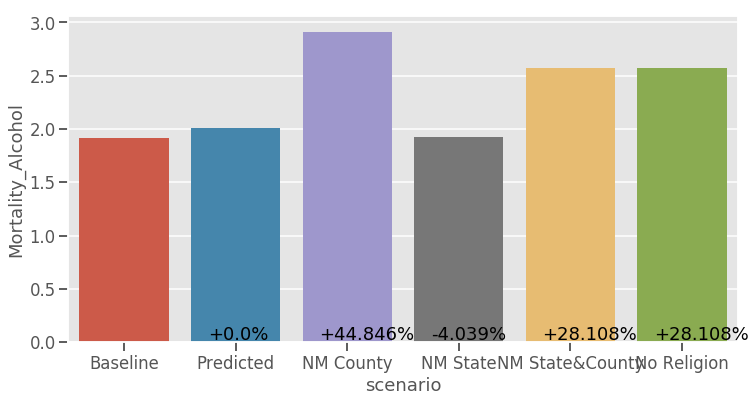

In [323]:
def plot_mormon_change(county, state,variable='mortality_alcohol'):
    sns.set_context("talk")
    plt.figure(figsize=(12, 6))
    data_salt = data.query("county==@county and state==@state")
    salt = X.loc[data_salt.index[0]].to_frame().T
    display(f'Position is {data_salt.index[0]}')
    baseline = data_salt[variable].values[0]
    predicted = xgb_opt.predict(salt)
    # No mormons
    nomormons = salt.assign(mormon=0)
    # No mormons in the state
    nostatemormon = salt.assign(state_mormon=0)
    # Both, plus no religiosity
    both = salt.assign(mormon=0, state_mormon=0)
    # No religion
    noreligion= salt.assign(
        mormon=0,
        state_mormon=0,
        muslim=0,
        o_jew=0,
    )
    predicted_nomorm = xgb_opt.predict(nomormons)
    predicted_both = xgb_opt.predict(both)
    predicted_nostatemormon = xgb_opt.predict(nostatemormon)
    predicted_norel = xgb_opt.predict(noreligion)
    k = pd.DataFrame(
        {
            "Baseline": baseline,
            "Predicted": predicted,
            "NM County": predicted_nomorm,
            "NM State": predicted_nostatemormon,
            "NM State&County": predicted_both,
            "No Religion": predicted_norel,
        }
    )
    display(k)
    sns.barplot(x="scenario", y="value", data=k.melt(var_name="scenario"))
    plt.ylabel(variable.title())
    for pos, col in enumerate(k):
        if col == "Baseline":
            continue
        delta_predicted = np.round(
            100 * (k.at[0, col] - k.at[0, "Predicted"]) / k.at[0, "Predicted"], 3
        )
        string = f"{str(delta_predicted)}%"
        if "-" not in string:
            string = "+" + string
        plt.annotate(string, xy=(pos - 0.25, 0.02))


plot_mormon_change("Madison", "Idaho")

In [337]:
data.sort_values('income_census')

,state,county,povrate,pop_census,income_census,nhwrate,blkrate,asianrate,nativerate,hisprate,b_protes,catholic,e_protes,m_protes,mormon,south_baptist,o_jew,muslim,pop2010,religiosity,pov_saipe_2010,pov_saipe_2017,mortality_alcohol,mortality_drug_us,mortality_self_ha,mortality_interpe,mortality,outcomes,state_mormon,altitude
419,Kentucky,Owsley,0.415115,8.449128,9.284241,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.780000,197.478889,127.230000,0.000000,142.800000,0.00,0.00,4755.0,0.332492,0.401,0.368,3.16,36.72,23.58,10.57,0.368278,0.471362,0.007339,307.271515
435,Kentucky,Wolfe,0.422040,8.881281,9.324918,0.996719,0.000000,0.000957,0.000000,0.000000,0.000000,5.710000,172.668889,34.938889,0.000000,52.618889,0.00,0.00,7355.0,0.213460,0.318,0.299,4.25,38.36,24.40,10.41,0.393224,0.455765,0.007339,353.813232
400,Kentucky,McCreary,0.352459,9.737492,9.408945,0.916510,0.038848,0.000000,0.011864,0.016389,0.000000,2.290000,179.560000,21.358889,13.550000,164.860000,0.00,0.00,18306.0,0.216814,0.365,0.344,1.72,15.12,18.92,8.36,0.204422,0.308557,0.007339,424.234528
363,Kentucky,Clay,0.344041,9.949942,9.417355,0.928999,0.050007,0.005136,0.002838,0.010722,5.480000,3.180000,410.490000,23.750000,0.000000,302.670000,0.00,0.00,21730.0,0.442890,0.380,0.417,1.77,33.82,15.85,9.41,0.278314,0.387345,0.007339,311.917114
999,Tennessee,Bledsoe,0.231127,9.320718,9.465525,0.931407,0.035455,0.001159,0.000618,0.020161,9.240000,0.000000,188.258889,29.198889,0.000000,43.960000,0.00,0.00,12876.0,0.226856,0.224,0.231,3.26,10.24,14.45,5.97,0.153464,0.199191,0.007184,441.531555
393,Kentucky,Lee,0.316472,8.833463,9.471396,0.977495,0.012969,0.001271,0.004577,0.003687,0.000000,14.710000,217.318889,31.440000,17.750000,66.310000,0.00,0.00,7887.0,0.281476,0.373,0.337,2.84,30.40,22.86,10.44,0.329444,0.424566,0.007339,317.952148
369,Kentucky,Elliott,0.365325,8.773385,9.478228,0.952889,0.040705,0.000000,0.000000,0.005071,0.000000,0.000000,20.120000,31.198889,0.000000,20.120000,0.00,0.00,7852.0,0.051325,0.299,0.297,2.34,18.01,16.08,6.99,0.196586,0.272549,0.007339,266.951019
1017,Tennessee,Hancock,0.303420,8.796036,9.526391,0.980242,0.002064,0.003981,0.001327,0.002949,0.000000,0.590000,828.128889,21.120000,0.000000,728.110000,0.00,0.00,6819.0,0.849831,0.309,0.284,2.80,18.58,29.43,6.85,0.293503,0.352214,0.007184,468.536194
73,Idaho,Madison,0.322414,10.444998,9.527703,0.913328,0.004312,0.008184,0.003350,0.055173,0.000000,15.508889,4.320000,0.510000,1007.860000,0.000000,0.00,0.00,37536.0,1.000000,0.284,0.191,1.92,4.73,8.27,1.40,0.038801,0.120742,0.260425,1911.668945
403,Kentucky,Magoffin,0.298165,9.483188,9.535968,0.983752,0.000602,0.000000,0.001504,0.002633,0.000000,2.330000,231.228889,18.678889,0.000000,109.500000,0.00,0.00,13333.0,0.252231,0.294,0.321,3.13,31.79,17.46,6.40,0.275026,0.339027,0.007339,310.763672


In [324]:
#Madison,Idaho
shap.force_plot(explainer.expected_value,shaps[73,:],X.loc[73,:])

'Position is 962'

,Baseline,Predicted,NM County,NM State,NM State&County,No Religion
0,2.88,2.749378,2.686194,2.749378,2.686194,2.440649


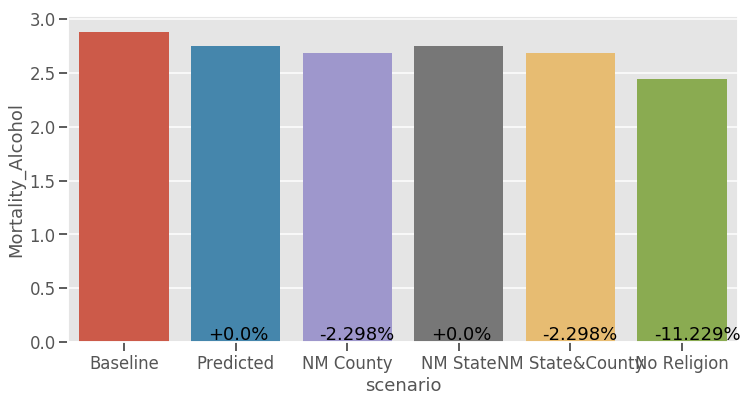

In [340]:
plot_mormon_change("Washington","Rhode Island",)

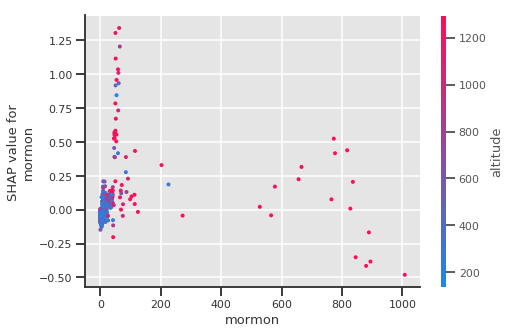

In [325]:
shap.dependence_plot("mormon", shaps,X)

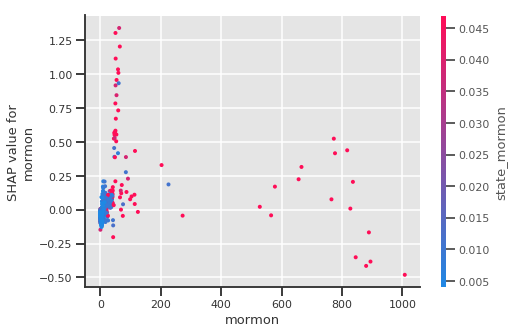

In [343]:
#All the mormons driving the correlation are in Mormon states
shap.dependence_plot("mormon", shaps,X,interaction_index='state_mormon')

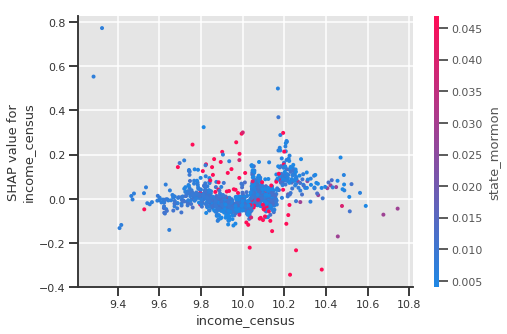

In [327]:
shap.dependence_plot("income_census", shaps, X)

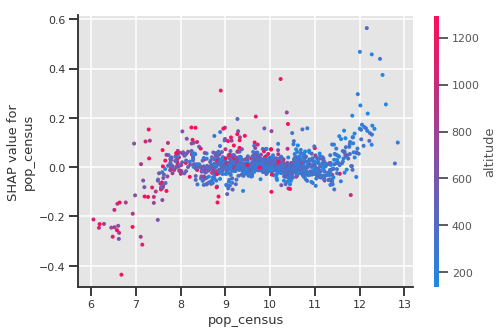

In [328]:
shap.dependence_plot("pop_census", shaps, X)

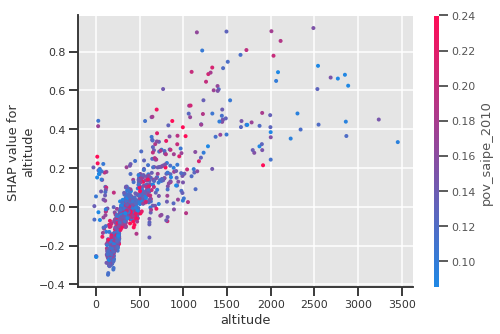

In [329]:
shap.dependence_plot("altitude", shaps, X)

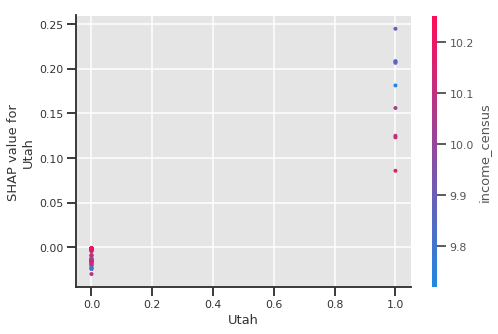

In [330]:
shap.dependence_plot("Utah", shaps, X)

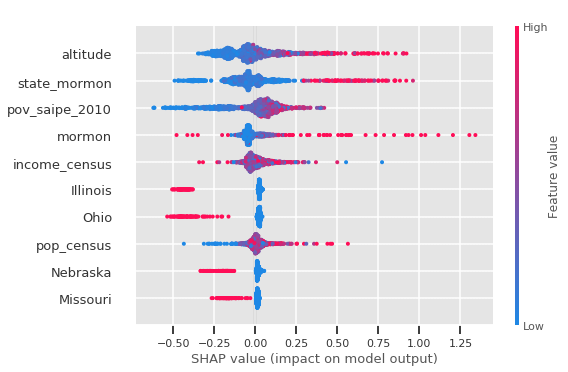

In [332]:
# This plot measures the impact of a variable on poverty. Each point is a particular county.
# The y-size of each row represents the density of points at that particular point
# High SHAP values mean in that case the variable in that case contributed to a higher poverty rate
# The sense in which it contributed can be glanced from the colorbar
# For example, the blue points in income_census mean that when income was low, the SHAP value was high (higher poverty)
# Positive values mean that in that part
shap.summary_plot(shaps,X,max_display=10)

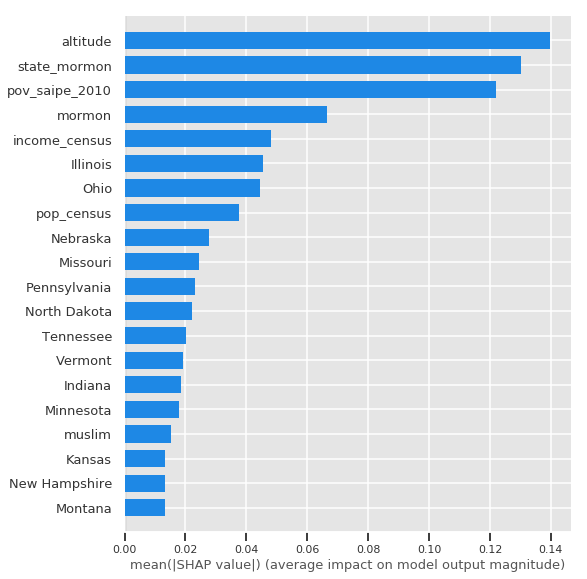

In [333]:
shap.summary_plot(shaps, X, plot_type="bar")

,Baseline,min(0.0),x0.5,x0.95,Predicted,x1.05,x1.5,max(1007.86)
0,2.88,2.686194,2.662147,2.749378,2.749378,2.749378,2.782677,2.504805


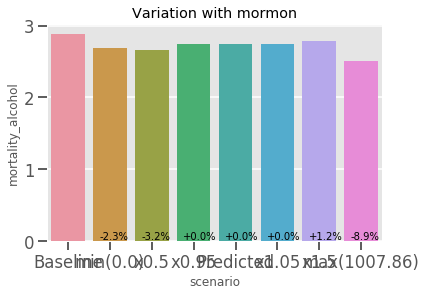

In [354]:
def plot_variable_change(county, state, variable, ax=None):
    data_salt = data.query("county==@county and state==@state")
    salt = X.iloc[data_salt.index[0]].to_frame().T
    # display(f'Position is {data_salt.index[0]}')
    baseline = data_salt.mortality_alcohol.values[0]
    predicted = xgb_opt.predict(salt)
    baseline_var = data_salt[variable].values[0]

    varmin = data[variable].min()
    varmax = data[variable].max()
    income_multiples = {
        f"min({round(varmin,2)})": varmin / baseline_var,
        "x0.5": 0.5,
        "x0.95": 0.95,
        "Predicted": 1.0,
        "x1.05": 1.05,
        "x1.5": 1.5,
        f"max({round(varmax,2)})": varmax / baseline_var,
    }
    scenarios = {}

    def multiplier_exp(df, variable, i):
        if variable in ["income_census", "pop_census"]:
            return np.log(np.exp(df[variable]) * i)
        else:
            return df[variable] * i

    for name, i in income_multiples.items():
        replacements = {variable: multiplier_exp(salt, variable, i)}
        new_var = multiplier_exp(salt, variable, i)
        original_var = baseline_var
        diff = new_var - original_var
        if variable == "nhwrate":
            # Reduce the coefficients of other races (blkrate,nativerate,asianrate)
            replacements["blkrate"] = np.clip(salt.blkrate - diff, a_min=0, a_max=1)
        elif variable == "blkrate":
            replacements["nhwrate"] = np.clip(salt.nhwrate - diff, a_min=0, a_max=1)

        scenarios[name] = xgb_opt.predict(salt.assign(**replacements))

    k = pd.DataFrame(scenarios)
    k.insert(0, "Baseline", baseline)

    display(k)
    if ax is not None:
        sns.barplot(x="scenario", y="value", data=k.melt(var_name="scenario"))
    else:
        sns.barplot(x="scenario", y="value", data=k.melt(var_name="scenario"), ax=ax)

    for pos, col in enumerate(k):
        if col == "Baseline":
            continue
        delta_predicted = np.round(
            100 * (k.at[0, col] - k.at[0, "Predicted"]) / k.at[0, "Predicted"], 1
        )
        string = f"{str(delta_predicted)}%"
        if "-" not in string:
            string = "+" + string
        plt.annotate(string, xy=(pos - 0.25, 0.02))
    plt.title(f"Variation with {variable}")
    plt.ylabel("mortality_alcohol")


plot_variable_change("Washington", "Rhode Island", "mormon")


In [350]:
data.sort_values('pop_census')

,state,county,povrate,pop_census,income_census,nhwrate,blkrate,asianrate,nativerate,hisprate,b_protes,catholic,e_protes,m_protes,mormon,south_baptist,o_jew,muslim,pop2010,religiosity,pov_saipe_2010,pov_saipe_2017,mortality_alcohol,mortality_drug_us,mortality_self_ha,mortality_interpe,mortality,outcomes,state_mormon,altitude
688,Nebraska,Arthur,0.077465,6.054439,9.889490,0.985915,0.000000,0.000000,0.000000,0.011737,0.000000,0.000000,0.000000,682.610000,0.000000,0.000000,0.000000,0.000000,460.0,0.682609,0.119,0.138,1.93,3.54,16.62,2.31,0.095865,0.095230,0.012800,1093.610962
730,Nebraska,McPherson,0.082988,6.177944,9.952278,0.975460,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.318889,113.170000,0.000000,0.000000,0.000000,0.000000,539.0,0.224490,0.189,0.127,1.29,2.73,12.14,1.81,0.050921,0.088673,0.012800,1030.781006
38,Colorado,Hinsdale,0.036810,6.192362,10.675746,0.924335,0.000000,0.000000,0.000000,0.073620,0.000000,67.620000,97.268889,167.258889,0.000000,97.268889,0.000000,0.000000,843.0,0.332147,0.094,0.086,2.41,3.47,18.61,2.35,0.114899,0.099356,0.028355,3453.525146
690,Nebraska,Blaine,0.124304,6.289716,9.932367,0.935065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,502.088889,179.918889,0.000000,0.000000,0.000000,0.000000,478.0,0.682008,0.203,0.145,1.28,2.85,13.49,1.97,0.061546,0.103448,0.012800,817.022522
729,Nebraska,Loup,0.190551,6.453625,9.903688,0.959055,0.000000,0.000000,0.009449,0.031496,0.000000,0.000000,126.578889,0.000000,0.000000,0.000000,0.000000,0.000000,632.0,0.126582,0.173,0.158,1.13,2.42,11.15,1.89,0.041481,0.074394,0.012800,735.640808
713,Nebraska,Grant,0.174046,6.484635,9.929058,0.983359,0.000000,0.000000,0.000000,0.013616,0.000000,97.718889,157.978889,371.338889,74.920000,0.000000,0.000000,0.000000,614.0,0.705212,0.121,0.100,1.63,3.58,19.66,2.37,0.113351,0.109779,0.012800,1139.129150
720,Nebraska,Hooker,0.066176,6.522093,9.961615,0.991304,0.000000,0.008696,0.000000,0.000000,0.000000,95.108889,184.780000,312.500000,0.000000,0.000000,0.000000,0.000000,736.0,0.592391,0.097,0.086,1.59,3.93,13.74,2.16,0.073229,0.067961,0.012800,994.230286
728,Nebraska,Logan,0.055718,6.525030,10.013238,0.960411,0.000000,0.000000,0.021994,0.000000,0.000000,460.028889,0.000000,108.780000,0.000000,0.000000,0.000000,0.000000,763.0,0.568807,0.125,0.089,1.40,3.07,14.37,2.16,0.071224,0.077899,0.012800,887.260742
689,Nebraska,Banner,0.161111,6.579251,10.000705,0.931944,0.000000,0.000000,0.000000,0.051389,0.000000,0.000000,89.858889,23.190000,0.000000,0.000000,0.000000,0.000000,690.0,0.113043,0.132,0.117,2.22,4.15,15.25,2.14,0.091743,0.097686,0.012800,1485.358032
832,North Dakota,Slope,0.104539,6.588926,10.119566,0.987620,0.000000,0.000000,0.000000,0.012380,0.000000,60.520000,0.000000,244.840000,0.000000,0.000000,0.000000,0.000000,727.0,0.305365,0.125,0.121,2.61,2.97,11.53,1.46,0.061174,0.068534,0.010202,852.016418


/home/jose/envs/env/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/home/jose/envs/env/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


,Baseline,min(0.0),x0.5,x0.95,Predicted,x1.05,x1.5,max(1007.86)
0,5.69,4.704108,4.704108,4.704108,4.704108,4.704108,4.704108,4.704108


,Baseline,min(-29.51),x0.5,x0.95,Predicted,x1.05,x1.5,max(3453.53)
0,5.69,3.329403,4.124454,4.621709,4.704108,4.575113,4.389682,4.389682


,Baseline,min(6.05),x0.5,x0.95,Predicted,x1.05,x1.5,max(12.85)
0,5.69,4.023157,3.693604,4.634806,4.704108,4.526017,4.422183,4.424098


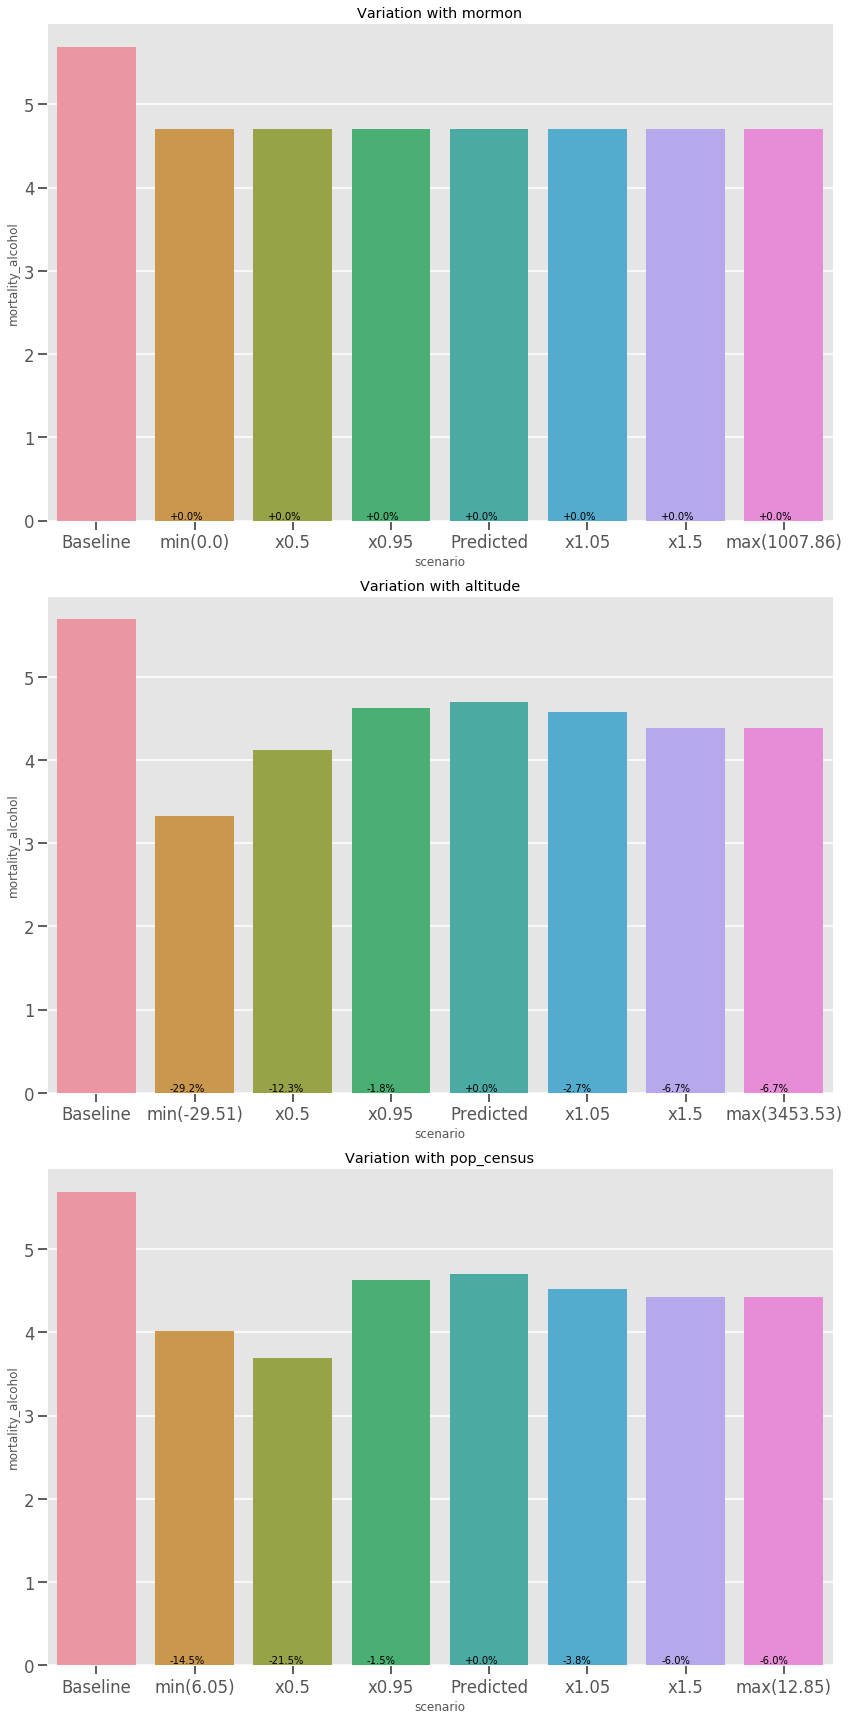

In [355]:
cols=['mormon','altitude','pop_census']
sns.set_context("talk")
plt.figure(figsize=(12, 24))
plt.style.use("ggplot")
for pos,var in enumerate(cols):
    ax=plt.subplot(len(cols),1,pos+1)
    plot_variable_change("Jackson", "Colorado",var,ax=ax)
plt.tight_layout()

In [237]:
def plot_mortality(data,mort):
    t = data[["county", "state", "mormon", f"mortality_{mort}"]]
    t.plot.scatter("mormon", f"mortality_{mort}")
    plt.axhline(t[f"mortality_{mort}"].mean())
    plt.axhline(t[f"mortality_{mort}"].median())

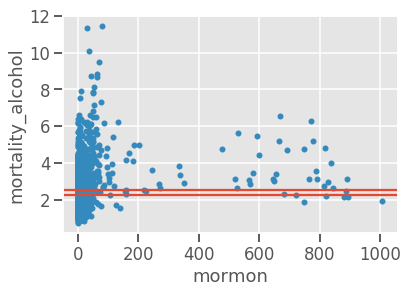

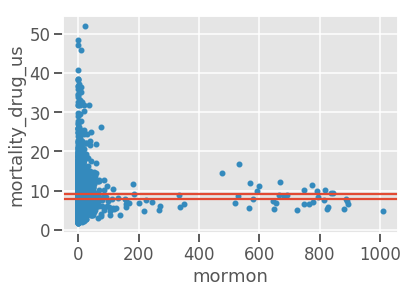

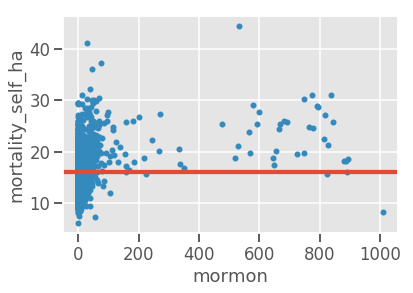

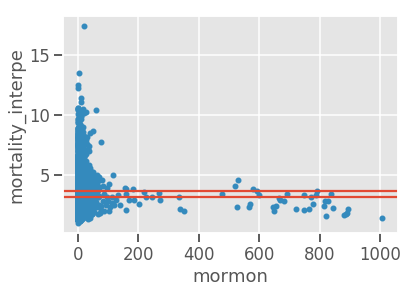

In [238]:
for i in ['alcohol','drug_us','self_ha','interpe']:
    plot_mortality(data,i)

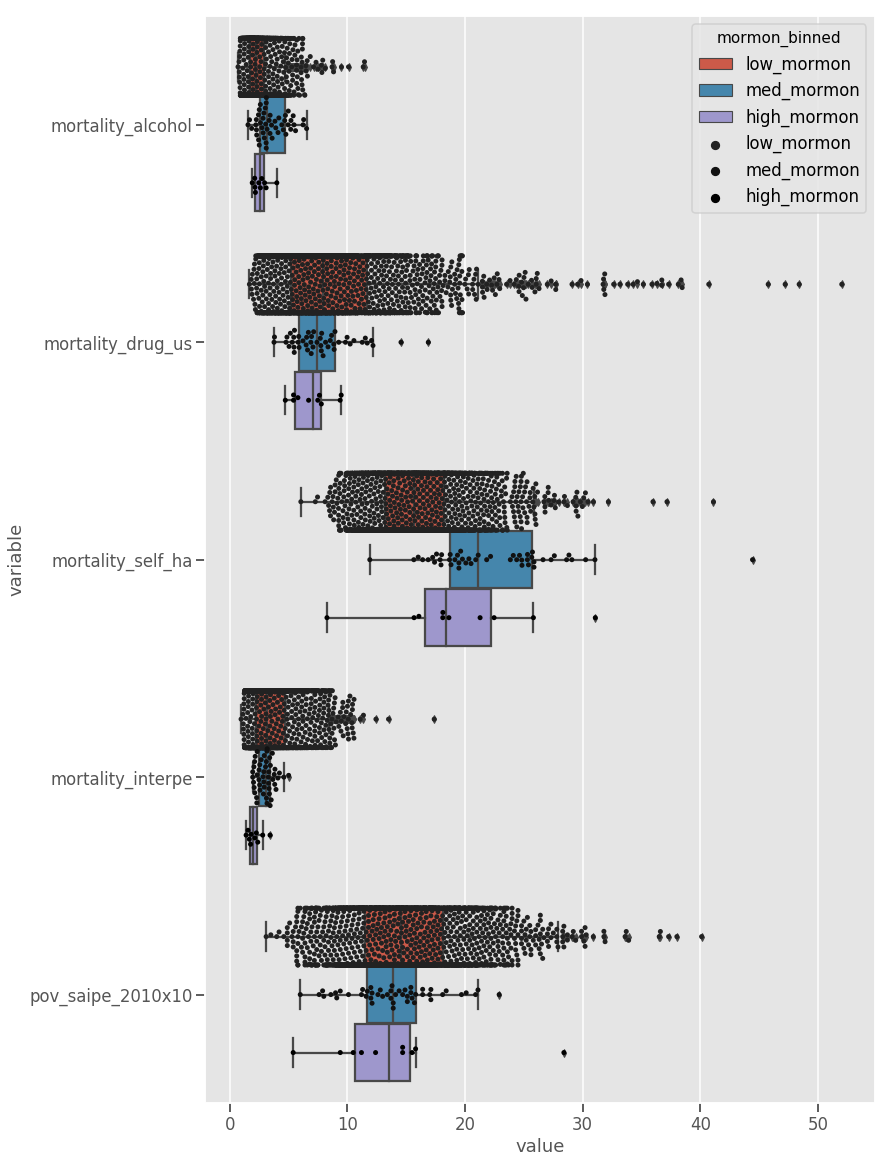

In [239]:
def cut(x):
    ret = np.where(
        x < 100, "low_mormon", np.where(x < 800, "med_mormon", "high_mormon")
    )
    return ret


# Best counties
t = (
    data.assign(
        mormon_binned=cut(data.mormon), pov_saipe_2010x10=data.pov_saipe_2010 * 100
    )
    .query("nhwrate>0.7")[
        [
            "mormon_binned",
            "mortality_alcohol",
            "mortality_drug_us",
            "mortality_self_ha",
            "mortality_interpe",
            "pov_saipe_2010x10",
        ]
    ]
    .sample(2000)
    .melt(id_vars="mormon_binned")
)
plt.figure(figsize=(12, 20))
sns.boxplot(y="variable", x="value", hue="mormon_binned", data=t)
sns.swarmplot(
    y="variable",
    x="value",
    hue="mormon_binned",
    data=t,
    dodge=True,
  
    color=".0",
    linewidth=0,
)

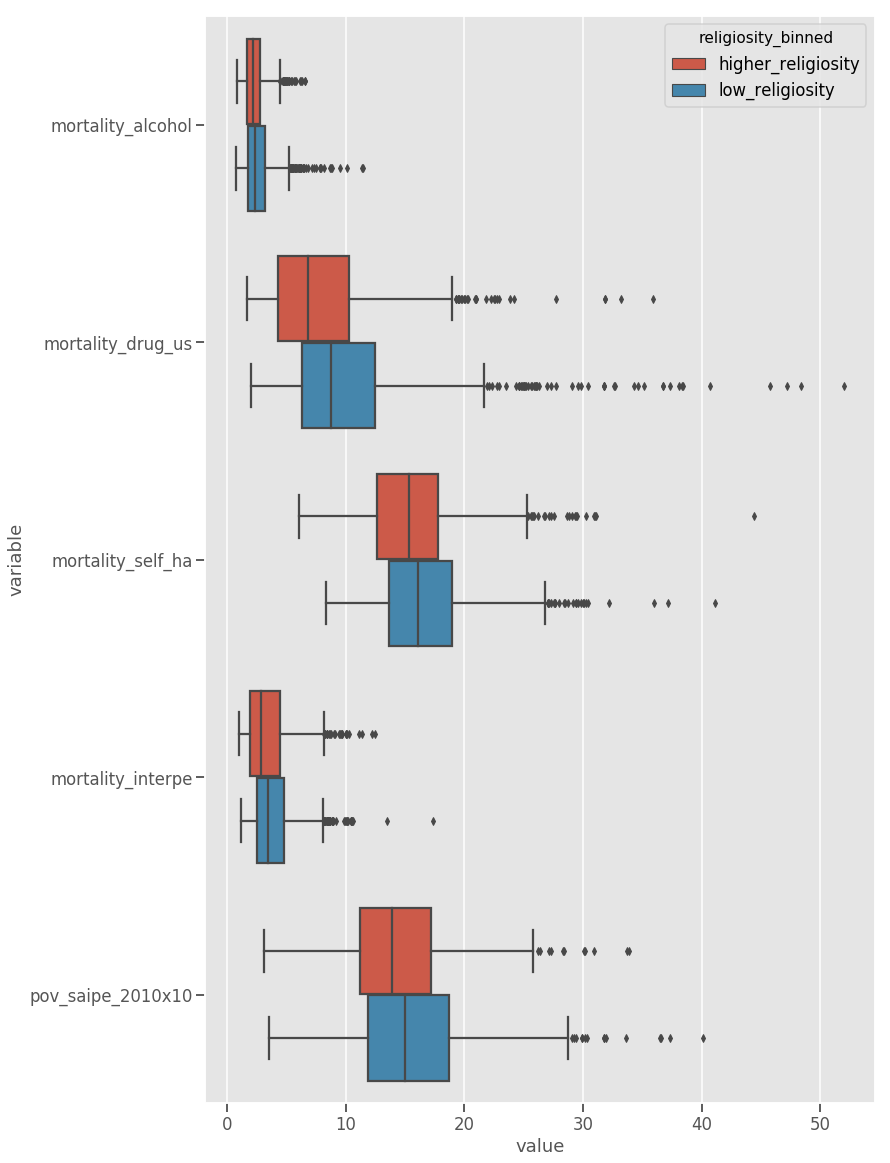

In [240]:
# Best counties (by religiosity)
t = (
    data.assign(
        religiosity_binned=np.where(
            data.religiosity < 0.5, "low_religiosity", "higher_religiosity"
        ),
        pov_saipe_2010x10=data.pov_saipe_2010 * 100,
    )
    [
        [
            "religiosity_binned",
            "mortality_alcohol",
            "mortality_drug_us",
            "mortality_self_ha",
            "mortality_interpe",
            "pov_saipe_2010x10",
        ]
    ]
    .sample(2000)
    .melt(id_vars="religiosity_binned")
)
plt.figure(figsize=(12, 20))
sns.boxplot(y="variable", x="value", hue="religiosity_binned", data=t)
